In [12]:
# imports - usual suspects
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# for distance and h-clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform

# sklearn does have some functionality too, but mostly a wrapper to scipy
from sklearn.metrics import pairwise_distances 
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics 


In [3]:
SQL = "SELECT * from `questrom.datasets.judges`"
YOUR_BILLING_PROJECT = "ba820-329602"
judges = pd.read_gbq(SQL, YOUR_BILLING_PROJECT)

In [5]:
judges.sample(3)

,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN,judge
32,7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8,"BRACKEN,J.J."
25,7.6,7.3,6.9,6.8,6.7,6.8,6.4,6.3,6.3,6.3,7.4,6.6,"MCGRATH,J.F."
15,7.0,7.5,6.4,6.8,6.5,7.0,6.6,6.8,6.3,6.6,6.2,6.5,"GRILLO,A.E."


In [19]:
judges.set_index("judge", inplace=True)
judges.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, ARMENTANO,A.J. to NARUK,H.J.
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CONT    43 non-null     float64
 1   INTG    43 non-null     float64
 2   DMNR    43 non-null     float64
 3   DILG    43 non-null     float64
 4   CFMG    43 non-null     float64
 5   DECI    43 non-null     float64
 6   PREP    43 non-null     float64
 7   FAMI    43 non-null     float64
 8   ORAL    43 non-null     float64
 9   WRIT    43 non-null     float64
 10  PHYS    43 non-null     float64
 11  RTEN    43 non-null     float64
dtypes: float64(12)
memory usage: 4.4+ KB


In [7]:
judges.describe()

,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
count,43.000000,43.000000,43.000000,43.000000,43.00000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,7.437209,8.020930,7.516279,7.693023,7.47907,7.565116,7.467442,7.488372,7.293023,7.383721,7.934884,7.602326
std,0.940877,0.770145,1.143705,0.900898,0.86011,0.802936,0.953370,0.948987,1.010044,0.961133,0.939575,1.100971
min,5.700000,5.900000,4.300000,5.100000,5.40000,5.700000,4.800000,5.100000,4.700000,4.900000,4.700000,4.800000
25%,6.850000,7.550000,6.900000,7.150000,7.00000,7.100000,6.900000,6.950000,6.850000,6.900000,7.700000,7.150000
50%,7.300000,8.100000,7.700000,7.800000,7.60000,7.700000,7.700000,7.600000,7.500000,7.600000,8.100000,7.800000
75%,7.900000,8.550000,8.350000,8.450000,8.05000,8.150000,8.200000,8.250000,8.000000,8.050000,8.500000,8.250000
max,10.600000,9.200000,9.000000,9.000000,8.70000,8.800000,9.100000,9.100000,8.900000,9.000000,9.100000,9.200000


<AxesSubplot:>

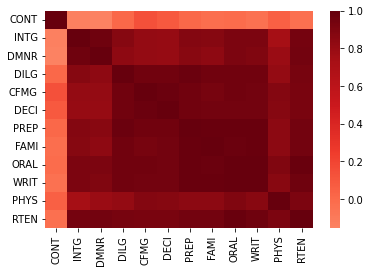

In [21]:
jc = judges.corr()
sns.heatmap(jc, cmap="Reds", center=0)

In [20]:
pca = PCA()
pcs = pca.fit_transform(judges)

In [22]:
pcs.shape

(43, 12)

In [23]:
type(pcs)

numpy.ndarray

In [25]:
varexp = pca.explained_variance_ratio_
varexp

array([8.47610159e-01, 9.01018931e-02, 2.84086516e-02, 2.03835230e-02,
       6.43416433e-03, 2.79968809e-03, 1.53529895e-03, 1.09058062e-03,
       7.02725931e-04, 4.68278946e-04, 2.86541481e-04, 1.78494745e-04])

C:\ProgramData\Anaconda3\envs\ba820\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


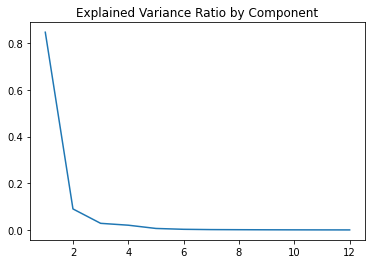

In [27]:
#plot
plt.title("Explained Variance Ratio by Component")
sns.lineplot(range(1,len(varexp)+1), varexp)
plt.show()

C:\ProgramData\Anaconda3\envs\ba820\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


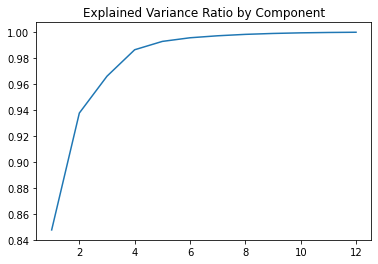

In [28]:
#Cum
#plot
plt.title("Explained Variance Ratio by Component")
sns.lineplot(range(1,len(varexp)+1), np.cumsum(varexp))
plt.show()

C:\ProgramData\Anaconda3\envs\ba820\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


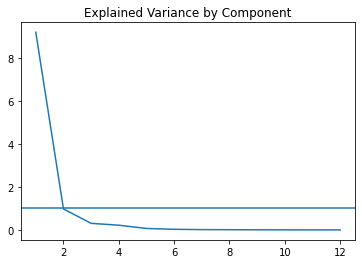

In [31]:
expl_var = pca.explained_variance_
plt.title("Explained Variance by Component")
sns.lineplot(range(1,len(varexp)+1), expl_var)
plt.axhline(1)
plt.show()

In [32]:
pca.n_components_
comps = pca.components_
COLS = ["PC" + str(i) for i in range(1, len(comps)+1)]
COLS

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12']

In [34]:
loadings = pd.DataFrame(comps.T, columns=COLS, index=judges.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
CONT,0.005991,0.933249,-0.319854,0.112933,-0.094623,0.002863,0.017716,-0.049192,0.034529,-0.026983,0.016713,-0.007431
INTG,-0.234760,-0.138724,-0.369816,0.252211,-0.045907,0.463156,-0.365509,0.417670,0.377488,0.180250,-0.159929,0.006194
DMNR,-0.347744,-0.232070,-0.663435,0.034666,0.194137,-0.360825,0.394379,-0.167205,0.123296,-0.037205,0.113103,0.055818
DILG,-0.286783,0.047954,0.224340,0.272806,0.375557,0.563859,0.255305,-0.282669,0.029243,-0.415718,0.097064,0.059530
CFMG,-0.272019,0.163199,0.189355,-0.024818,0.479640,-0.169861,0.108986,0.680469,-0.268978,0.131736,0.194316,0.040188
DECI,-0.253302,0.117624,0.249203,-0.024621,0.420295,-0.368777,-0.482836,-0.317726,0.407522,0.097204,-0.186972,0.045702
PREP,-0.309108,0.047023,0.217022,0.191110,-0.145537,0.063862,0.383739,-0.169372,-0.072270,0.640666,-0.340001,-0.293499
FAMI,-0.305101,0.014033,0.266923,0.168833,-0.470740,-0.107555,0.024308,-0.005991,0.229474,0.122914,0.535439,0.467666
ORAL,-0.331953,0.009669,0.037187,0.007519,-0.252866,-0.141531,-0.007365,0.116736,-0.271991,-0.355428,-0.636767,0.429930
WRIT,-0.313966,-0.018093,0.114879,0.141585,-0.294750,-0.227041,-0.102307,0.141543,0.067270,-0.435038,0.106013,-0.702784


In [36]:
comp_judges = pcs[:,:2]
comp_judges.shape

j = pd.DataFrame(comp_judges, columns=["c1","c2"], index=judges.index)
j.head()

,c1,c2
judge,,
"ARMENTANO,A.J.",-0.246242,-0.294062
"ALEXANDER,J.M.",-2.313155,-0.815382
"CALLAHAN,R.J.",-3.701680,2.941512
"MULVEY,H.M.",-3.171528,0.136067
"SHEA,J.F.JR.",-3.414491,-0.141469


<AxesSubplot:xlabel='c1', ylabel='c2'>

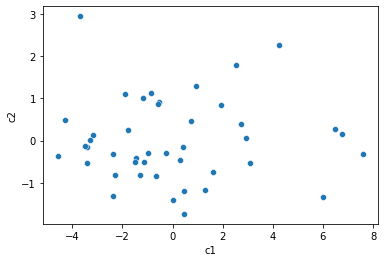

In [37]:
sns.scatterplot(data=j, x="c1", y="c2")